In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df_path = "c:/Users/Userpc/Desktop/Projects/ML Shortcuts/Data/data1.csv"
df = pd.read_csv(df_path)

<Axes: xlabel='x', ylabel='y'>

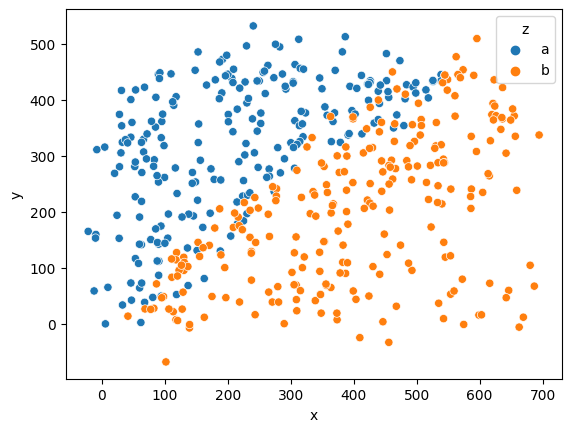

In [3]:
sns.scatterplot(data=df, x = "x", y = "y", hue="z")

In [4]:
X = df[["x", "y"]].values
y = df["z"] == "b"

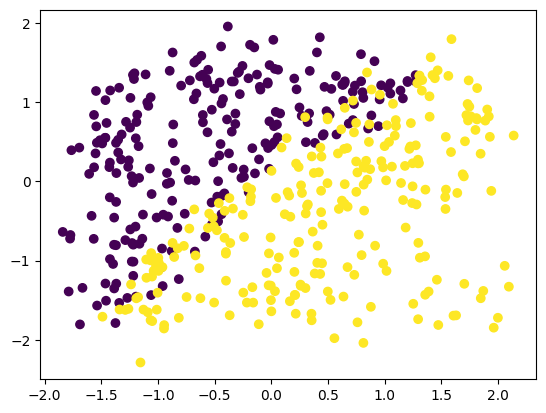

In [5]:
from sklearn.preprocessing import StandardScaler

X_new = StandardScaler().fit_transform(X)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

If there are outliers in the dataset we can use __QuantileTransformer__ instead of StandardScaler

c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (476). n_quantiles is set to n_samples.
  warnings.warn(


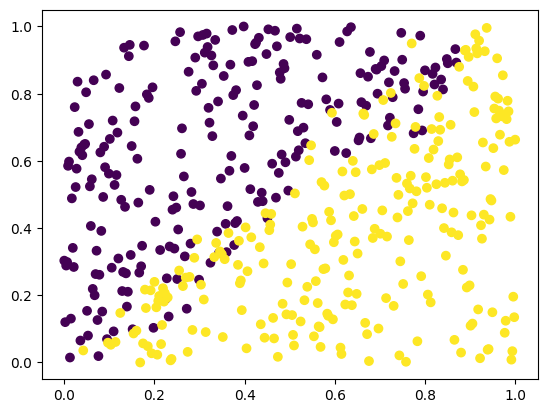

In [6]:
from sklearn.preprocessing import QuantileTransformer

X_new2 = QuantileTransformer().fit_transform(X)

plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y)

There is a difference, but in this case it is unnoticable. I will try something else on another dataset.

In [7]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression()
mod.fit(X, y)
result = mod.predict(X)

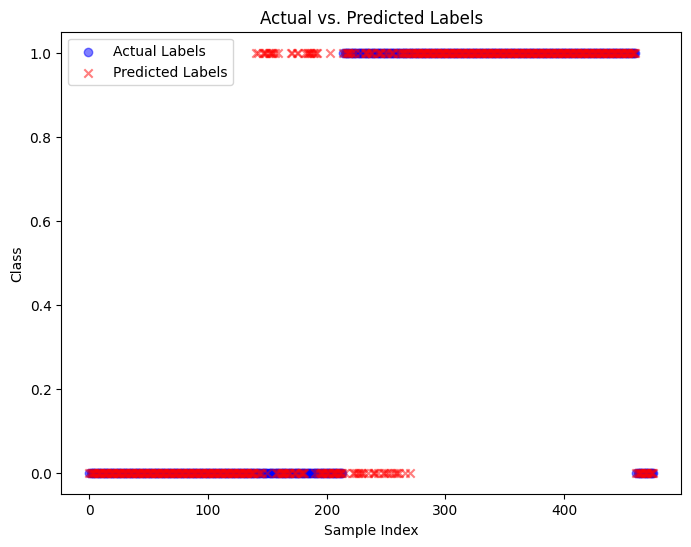

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(y)), y, label='Actual Labels', alpha=0.5, marker='o', color='b')
plt.scatter(np.arange(len(result)), result, label='Predicted Labels', alpha=0.5, marker='x', color='r')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.show()

In [9]:
df2_path = "c:/Users/Userpc/Desktop/Projects/ML Shortcuts/Data/data2.csv"
df2 = pd.read_csv(df2_path)

In [10]:
df2.shape

(680, 3)

In [11]:
X = df2[["x", "y"]].values
y = df2["z"] == "a"

<Axes: xlabel='x', ylabel='y'>

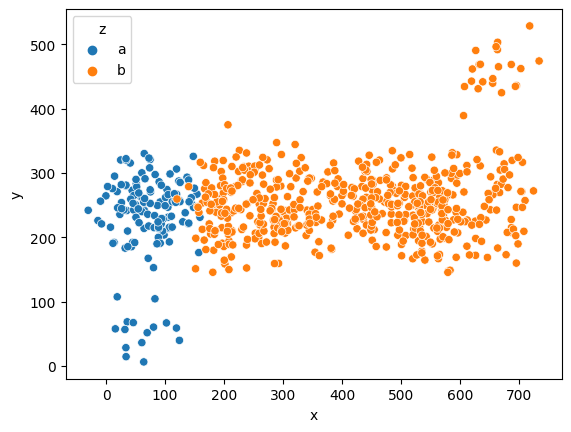

In [12]:
sns.scatterplot(data=df2, x="x", y="y", hue="z")

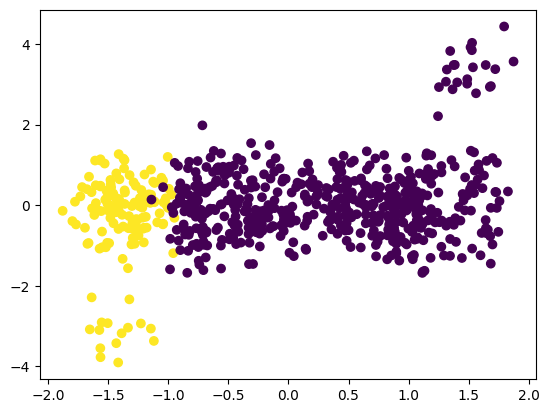

In [13]:
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (680). n_quantiles is set to n_samples.
  warnings.warn(


array([[ 33.83246604,  14.63321242],
       [ 80.3843932 ,  60.54396113],
       [ 15.64523479,  57.86382574],
       ...,
       [630.52783974, 430.89510733],
       [655.43062866, 446.62866896],
       [702.9002121 , 462.18710749]])

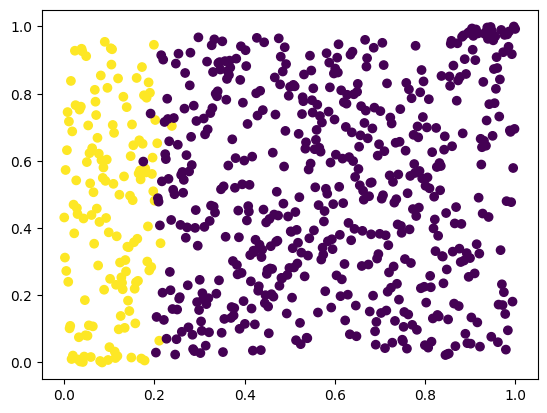

In [14]:
X_new1 = QuantileTransformer().fit_transform(X)
plt.scatter(X_new1[:, 0], X_new1[:, 1], c=y)
X

In [15]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=100)),
    ('model', LogisticRegression())
])
pred = pipe.fit(X, y).predict(X)

In [16]:
df3_path = "c:/Users/Userpc/Desktop/Projects/ML Shortcuts/Data/data3.csv"
df3 = pd.read_csv(df3_path)
df3

,x,y,z
0,38.221726,353.965198,a
1,28.044457,343.026031,a
2,19.167204,332.578543,a
3,28.030712,339.717159,a
4,60.582761,299.515307,a
...,...,...,...
451,235.619042,314.734345,b
452,148.502702,288.212160,b
453,148.846552,218.373277,b
454,133.224119,173.563234,b


In [17]:
X = df3[["x", "y"]].values
y = df3["z"] == "a"

<Axes: xlabel='x', ylabel='y'>

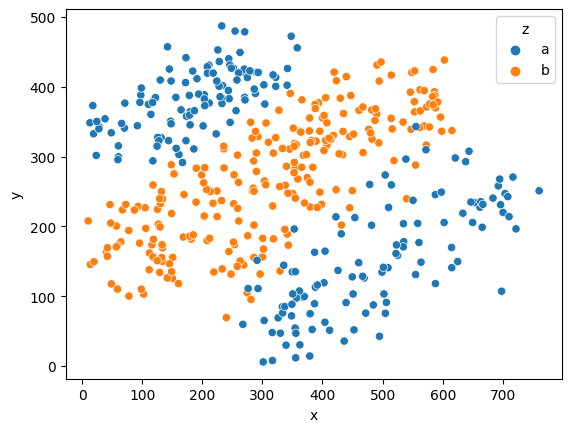

In [18]:
sns.scatterplot(data=df3, x="x", y="y", hue="z")

In [19]:
from sklearn.preprocessing import PolynomialFeatures


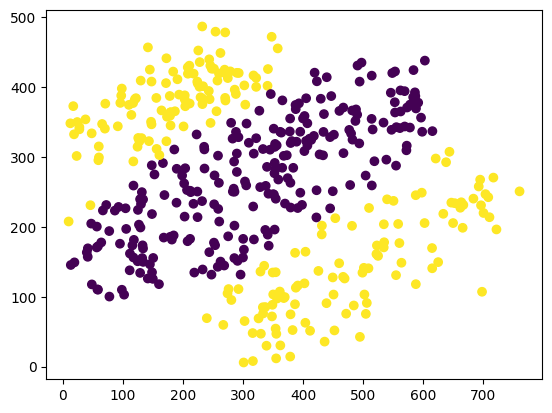

In [20]:
pipe = Pipeline([
    ('scale', PolynomialFeatures()),
    ('model', LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)

<Axes: xlabel='x', ylabel='y'>

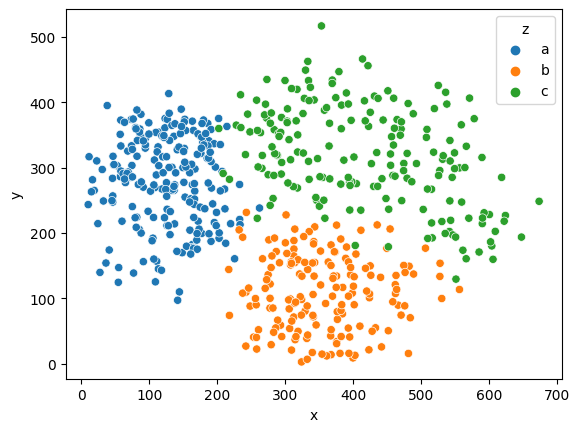

In [21]:
df4_path = "c:/Users/Userpc/Desktop/Projects/ML Shortcuts/Data/data4.csv"
df4 = pd.read_csv(df4_path)
df4.value_counts()

sns.scatterplot(data=df4, x="x", y="y", hue="z")

In [22]:
X = df4[["x", "y"]].values
y = df4["z"] == "b"

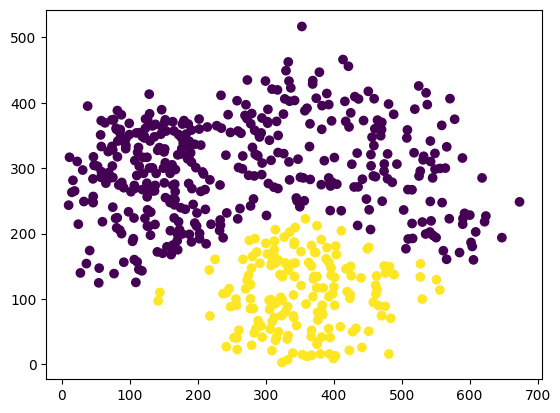

In [23]:
pipe = Pipeline([
    ('scale', PolynomialFeatures()),
    ('model', LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)